# 1 Regression on Iris Dataset
## 1.1 Scatterplot

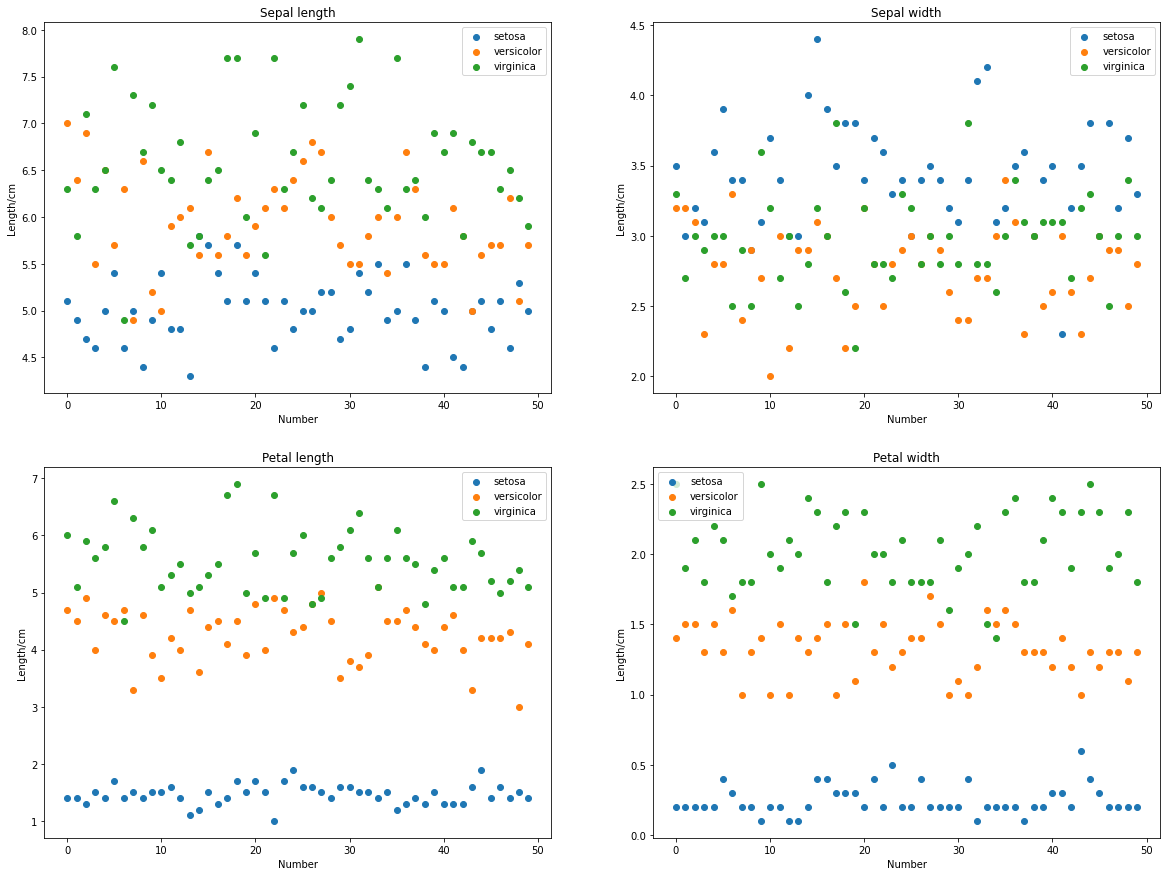

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()#由sklearn中载入经典数据集
data=iris['data']#从字典中取出数据与标签,类型为numpy array
tag=iris['target']

metric=['Sepal length','Sepal width','Petal length','Petal width']
plt.figure(figsize=(20,15))
for i in range(4):#循环在四个子图中画出不同测量量
    plt.subplot(2,2,i+1)
    plt.scatter(range(50),data[0:50,i],label='setosa')#利用numpy切片运算，按照三个类别依次绘制第一维数据的散点图
    plt.scatter(range(50),data[50:100,i],label='versicolor')
    plt.scatter(range(50),data[100:150,i],label='virginica')
    plt.legend()#显示图例
    plt.xlabel('Number')#设置散点图横纵轴
    plt.ylabel('Length/cm')
    plt.title(metric[i])

+ 将每个类别分别绘制散点图后可以看到，在前两幅图中，三种颜色（代表三个不同样本种类）的散点虽然有大致的分层，但分界面处混叠非常明显。因此如果以前两幅所示的指标作为分类依据，分类面形状将是复杂的高次函数，分类效果较差。后两幅图中，三种类别的散点层次分明，几乎没有混叠，尤其是蓝色点与其他两者差异相当明显，用简单的线性分类面即可获得良好的分类效果。
## 1.2 Linear Regression

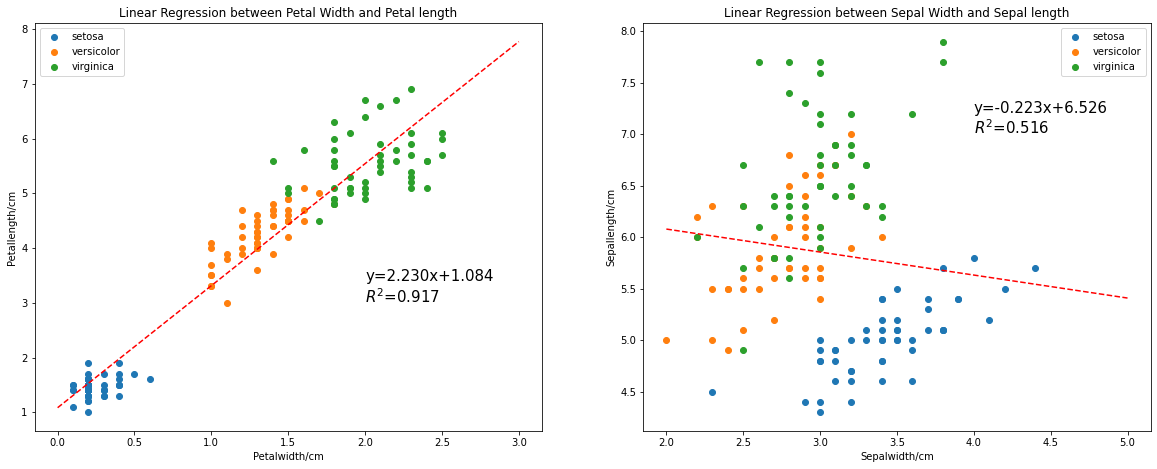

In [4]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()#调用sklearn中线性回归工具包，例化线性回归器对象

plt.figure(figsize=(20,7.5))
metric=['Petal','Sepal']
achor=np.array([[0,3],[2,5]])#根据数据范围确定描绘直线的大致长度
text_pos=[[2,3],[4,7]]#根据数据范围确定text的大致位置
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.scatter(data[0:50,3-2*i],data[0:50,2-2*i],label='setosa')
    plt.scatter(data[50:100,3-2*i],data[50:100,2-2*i],label='versicolor')
    plt.scatter(data[100:150,3-2*i],data[100:150,2-2*i],label='virginica')
    
    LR.fit(data[:,3-2*i].reshape(-1,1),data[:,2-2*i].reshape(-1,1))#线性回归
    ave=np.mean(data[:,2-2*i])
    sst=np.sum(np.square(data[:,2-2*i]-(data[:,2-2*i]*LR.coef_[0][0]+LR.intercept_[0])))#残差平方和
    ssr=np.sum(np.square(data[:,2-2*i]-ave))
    r_2=1-ssr/sst#根据R平方定量比较线性拟合程度
    
    plt.plot(achor[i],achor[i]*LR.coef_[0][0]+LR.intercept_[0],linestyle='--',c='red')
    plt.text(text_pos[i][0],text_pos[i][1],'y=%.3fx+%.3f\n$R^2$=%.3f'%(LR.coef_[0][0],LR.intercept_[0],r_2),fontsize=15)
    plt.xlabel(metric[i]+'width/cm')
    plt.ylabel(metric[i]+'length/cm')
    plt.title('Linear Regression between '+metric[i]+ ' Width and '+metric[i]+' length')
    plt.legend()

可以看到两组指标线性回归情况有明显不同。
+ 第一组花瓣长度与宽度有明显的正相关关系，线性拟合R平方值大于0.9，因此通过花瓣长度课以较好地线性预测花瓣宽度，反之亦可。同时注意到三个不同类别的散点在花瓣长度、宽度坐标系下形成了三个边界较为明显的clusters，这完全对应与1.1中花瓣宽度、长度两个测量量分界面明显。利用K-means等简单的聚类算法即可无监督地得到三个类别的中心。
+ 第二组中，每一个类别的散点花萼长度、宽度有较明显的正相关关系，但三类混合后，线性关系十分微弱，拟合R平方仅为0.5左右。这是由于三个类别在花瓣长度与宽度上均没有比较明显的分类界面（与1.1中结论一致），因此三个“线性团”发生了混叠，造成了总体线性的丧失。在未知所属类别的情况下，花瓣长度和花瓣宽度难以相互线性预测。

## 1.3 Logistic Regression

Decision Surface 1: -3.029x1+3.125x2=0
Decision Surface 2: 0.411x1+1.590x2=0


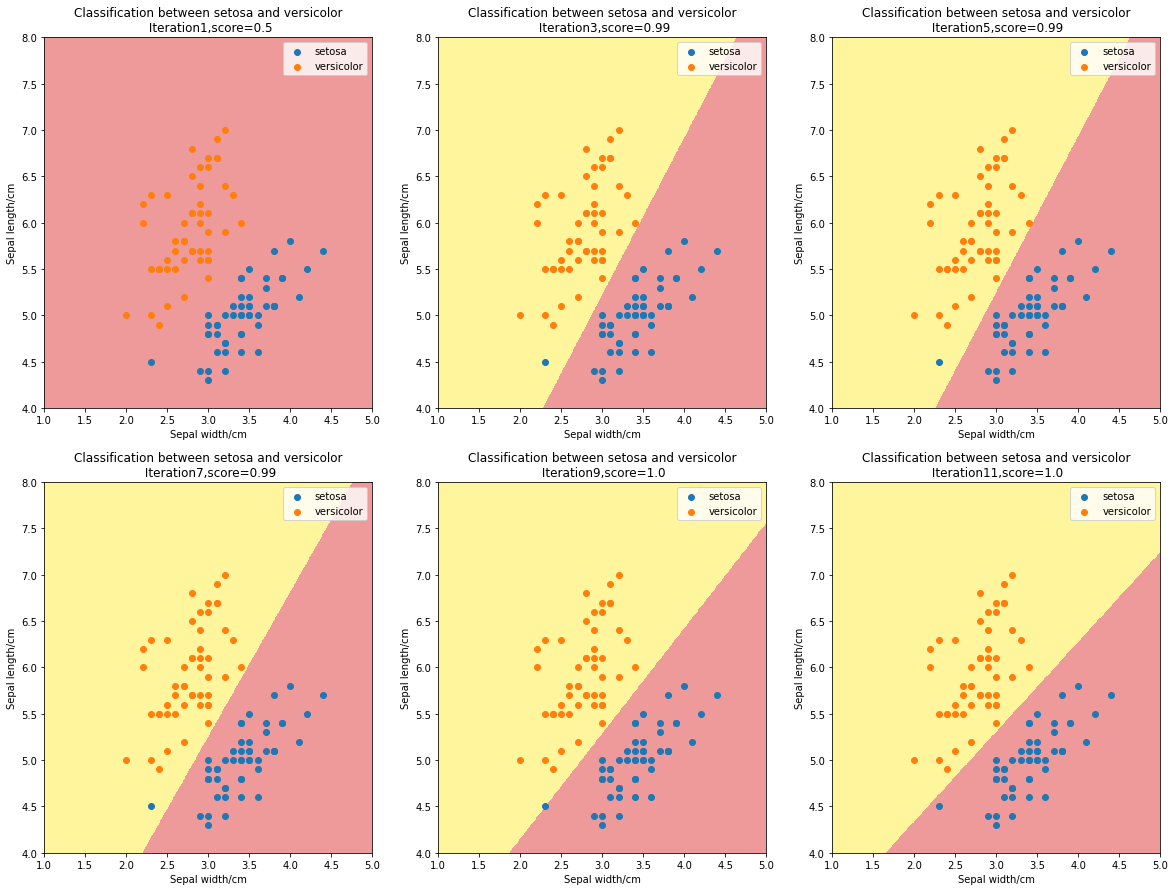

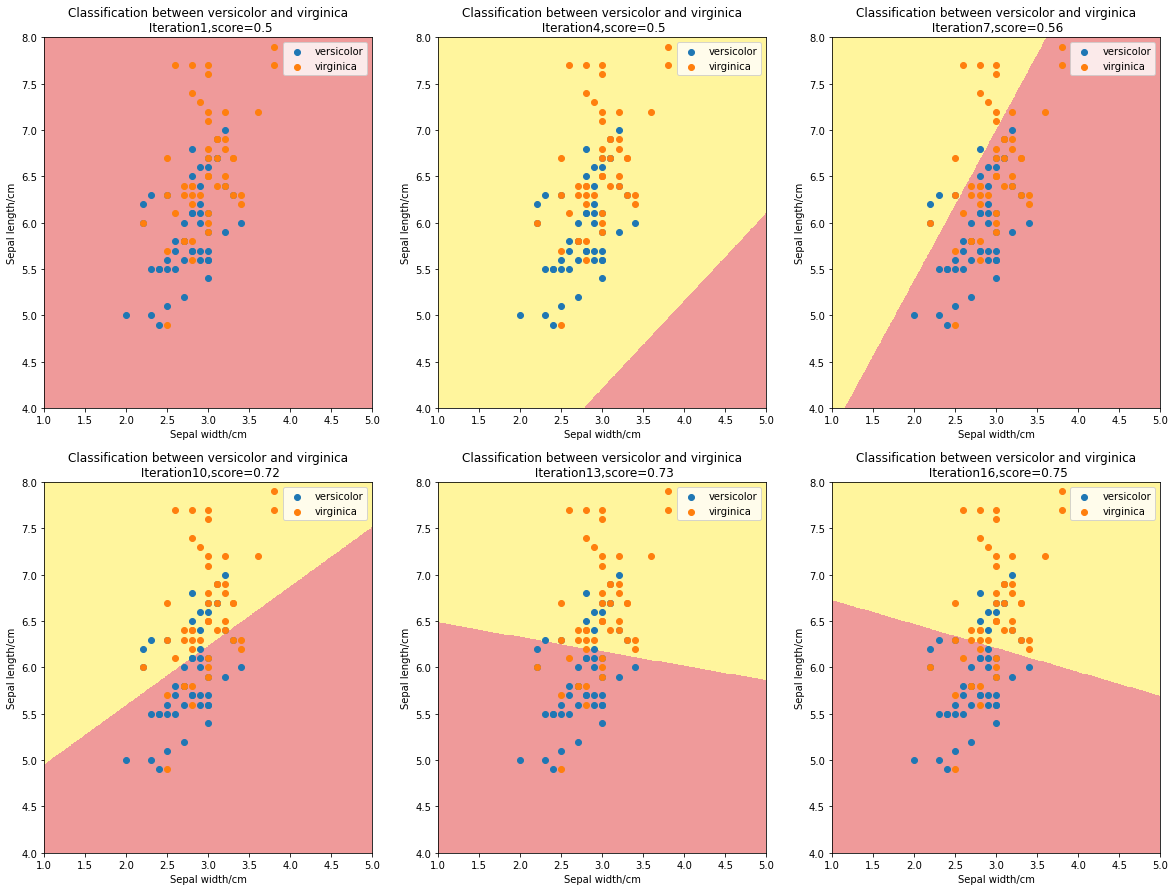

In [13]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model,axis):
    x0,x1=np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3], int((axis[3] - axis[2])*100)).reshape(-1,1)
    )#由坐标向量生成坐标网络
    x_new=np.c_[x0.ravel(),x1.ravel()]
    y_pre=model.predict(x_new)#通过训练得到的模型对坐标网络进行分类
    zz=y_pre.reshape(x0.shape)
    cus=ListedColormap(["#EF9A9A","#FFF59D"])
    plt.contourf(x0,x1,zz,cmap=cus)#画出分类界面

X=[data[0:100,[1,0]],data[50:150,[1,0]]]#取Setosa和Versicolor数据和标签、取Versicolor和Virginica数据和标签
Y=[tag[0:100],tag[50:150]]
step=[2,3]
Label=[['setosa','versicolor'],['versicolor','virginica']]

import warnings
warnings.filterwarnings('ignore')#下面设置最大迭代次数会产生迭代不足warning，此处屏蔽该warning

for i in range(2):
    plt.figure(figsize=(20,15))
    for j in range(6):
        plt.subplot(2,3,j+1)
        LogR=LogisticRegression(max_iter=step[i]*j+1)#例化逻辑回归器，设定最大迭代次数
        LogR.fit(X[i],Y[i])#逻辑回归
        plot_decision_boundary(LogR,axis=[1,5,4,8])#画出决策面
        plt.scatter(X[i][0:50,0],X[i][0:50,1],label=Label[i][0])
        plt.scatter(X[i][50:100,0],X[i][50:100,1],label=Label[i][1])
        plt.xlabel('Sepal width/cm')
        plt.ylabel('Sepal length/cm')
        plt.title('Classification between '+Label[i][0]+' and '+Label[i][1]+'\n Iteration{},score={}'.format(step[i]*j+1,LogR.score(X[i],Y[i])))
        #用score函数得到分类准确率，写入图表标题中
        plt.legend()
    print('Decision Surface {}: {:.3f}x1+{:.3f}x2=0'.format(i+1,LogR.coef_[0][0],LogR.coef_[0][1]))#输出最终分类器的决策面方程


+ 上方的六幅图像展示了采取Sepal length和Sepal width这两个特征维度，采用Logistic Regression分类器实现Setosa和Versicolor分类的过程。六幅图像分别是梯度下降迭代1、3、5、7、9、11次时的分类面。可以看到初始化后分界面不能有效区分两个类别（即分类准确率为50%），经过迭代后分类准确率提升，最终分类准确率达到1.0，因此以Sepal length和Sepal width为特征，Setosa和Versicolor是线性可分的，分类面方程为-3.029x1+3.125x2=0。
+ 下方的六幅图像展示了采取Sepal length和Sepal width这两个特征维度，采用Logistic Regression分类器实现Versicolor和Virginica分类的过程。六幅图像分别是梯度下降迭代1、4、7、10、13、16次时的分类面。可以看到初始化后分界面不能有效区分两个类别（即分类准确率为50%），经过迭代后分类准确率提升。最终分类准确率不再提升时达到0.75，并不能完全区分两类样本，因此以Sepal length和Sepal width为特征，Versicolor和Virginica是线性不可分的，最终得到的最优分类面方程为0.411x1+1.590x2=0。

## 总结：
+ 本题目中使用了自然界花瓣、花萼的尺寸作为数据，研究了线性拟合和逻辑回归的问题。可以发现，真实世界的数据集中，有些量是具有明显的线性相关性的，而另外一些量之间则没有明显的线性关系。在数据分析过程中，可以充分利用这些关系进行处理。在进行逻辑回归分类的过程中，可以发现在某些选定特征下，有的样本之间可以用简单的线性分类面区分，有些则不行。因此在实际中一方面要选择合适的特征维度，以获得较好的分类性能；另一方面可以通过添加高维特征，获得多项式分类面。
+ 在programming方面，numpy内置了很多矩阵运算，具有较高的执行效率。实际数据集多用矩阵方式存储，因此进行计算时要尽量避免for循环处理矩阵，利用相关函数提升运算效率。同时，绘制多幅类似图像时可以复用同一段代码，不必要复制粘贴大量类似代码。